In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pysta
import stc
%load_ext autoreload
%autoreload 2

# run for all cells (OFF LINE)

run 
```
python3 stc_batch.py [DATASET]
```

datasets
* 20180618
* 20180621
* 20180626
* 20180828

## load data

In [2]:
# load data

# load stim and spike data
#dataset_name = "20180618"
dataset_name = "20180621"
#dataset_name = "20180626"
#dataset_name = "20180828"
dataset_filename = "data/{}.mat".format(dataset_name)

stim, spike_train, info = pysta.load_data(dataset_filename)

channel_names = [ch.replace("ch_","") for ch in info["channel_names"]]
# info["channel_names"]

# load cell type
cell_type = pd.read_csv("data/{}_cell_type.csv".format(dataset_name))


List of arrays in this file: 
 <KeysViewHDF5 ['#refs#', 'channel_names', 'height', 'sampling_rate', 'spike_train', 'stim', 'width']>
Shape of the array stim:  (64, 9000)
Shape of the array spike_train:  (115, 9000)
length of the list channel_names:  115
sampling_rate:  10.0


## result - eigenvalues

In [3]:
# read eigenvalus
all_eig_values = dict()
# eigen_values = list()
largest_eig_values = list()

folder_name = "{}_stc_tap8".format(dataset_name)
#folder_name = "stc_tap10_center_half"
for channel_name in channel_names: #info["channel_names"]:
    filename = "{}/ch_{}_eig_val.txt".format(folder_name,channel_name)
    eig_val = np.loadtxt(filename)
    
    all_eig_values[channel_name] = eig_val
#     eigen_values.append(eig_val)
    largest_eig_values.append(eig_val[0])
    
    #print(channel_name)
# plt.hist(largest_eig_values)

# all_eig_values

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a220ecb10>,
      dtype=object)

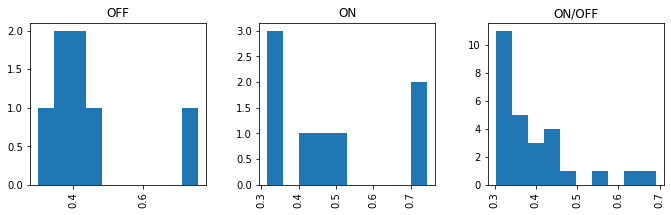

In [4]:
# convert to DataFrame
eig = pd.DataFrame({"channel_name": channel_names, "largest_eig_values":largest_eig_values})

results = cell_type.merge(eig, on="channel_name")
results.hist(column=["largest_eig_values"], by=["cell_type"], layout=(1,3), figsize=(11,3))


Text(0.5, 1.0, 'ON/OFF')

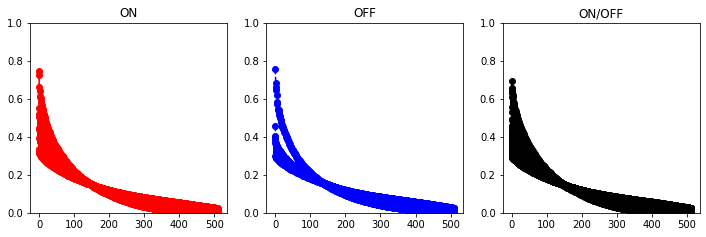

In [5]:
# plot eigenvalues for cell type

plt.figure(figsize=(12,3.5))
ax=plt.subplot(131)
for channel_name in cell_type.loc[cell_type["cell_type"] == "ON"]["channel_name"]:
    #print(channel_name)    
    plt.plot(all_eig_values[channel_name], 'or--')
ax.set_ylim(0, 1)
plt.title("ON")

ax=plt.subplot(132)    
for channel_name in cell_type.loc[cell_type["cell_type"] == "OFF"]["channel_name"]:
    #print(channel_name)    
    plt.plot(all_eig_values[channel_name], 'ob--')
ax.set_ylim(0, 1)    
plt.title("OFF")

ax=plt.subplot(133)    
for channel_name in cell_type.loc[cell_type["cell_type"] == "ON/OFF"]["channel_name"]:
    #print(channel_name)    
    plt.plot(all_eig_values[channel_name], 'ok--')
ax.set_ylim(0, 1)    
plt.title("ON/OFF")

## result - kurtosis

,channel_name,kurtosis
0,12a,0.047361
1,13a,0.048693
2,13b,0.054572
3,13c,0.351167
4,14a,0.119820
...,...,...
110,85c,-0.078257
111,86a,0.007039
112,86b,0.162774
113,87a,0.099374


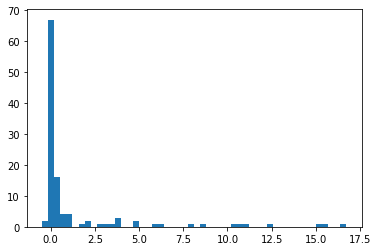

In [6]:
# load kurtosis
#tap = 5
Ks = np.loadtxt("{}/kurtosis.txt".format(folder_name))
plt.hist(Ks,50)

# store into a DataFrame
# remove "ch_" from channel names
kurtosis = pd.DataFrame({"channel_name": channel_names, "kurtosis": Ks})

kurtosis



In [7]:
# merge with cell_type
#cell_type
results = results.merge(kurtosis, on="channel_name", how="outer")
#results = cell_type.merge(kurtosis, on="channel_name")
# results.hist(column=["kurtosis"], by=["cell_type"], layout=(1,3), figsize=(12,3.5))

In [8]:
results

,channel_name,cell_type,largest_eig_values,kurtosis
0,12a,ON/OFF,0.455981,0.047361
1,13c,ON/OFF,0.381917,0.351167
2,16a,ON/OFF,0.315114,-0.001641
3,21b,ON/OFF,0.318001,0.133269
4,22b,ON/OFF,0.313448,0.105355
...,...,...,...,...
110,83b,NaN,NaN,2.042236
111,83c,NaN,NaN,15.476388
112,85c,NaN,NaN,-0.078257
113,86a,NaN,NaN,0.007039


Text(0, 0.5, 'count')

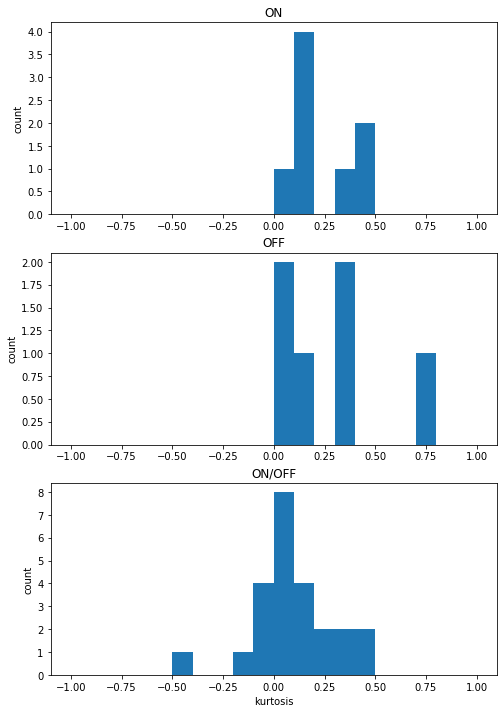

In [9]:
k_on = results.loc[results["cell_type"]=="ON","kurtosis"]
k_off = results.loc[results["cell_type"]=="OFF","kurtosis"]
k_on_off = results.loc[results["cell_type"]=="ON/OFF","kurtosis"]

bins = np.linspace(-1,1,21)
# plt.hist(k_on, bins)
# plt.hist(k_off, bins)
# plt.hist(k_on_off, bins)

# plot separately 
plt.figure(figsize=(8,12))
plt.subplot(3,1,1)
plt.hist(k_on, bins)
plt.title("ON")
# plt.xlabel("kurtosis")
plt.ylabel("count")

plt.subplot(3,1,2)
plt.hist(k_off, bins)
plt.title("OFF")
# plt.xlabel("kurtosis")
plt.ylabel("count")

plt.subplot(3,1,3)
plt.hist(k_on_off, bins)
plt.title("ON/OFF")
plt.xlabel("kurtosis")
plt.ylabel("count")

In [10]:
results.loc[results["kurtosis"]<0]

,channel_name,cell_type,largest_eig_values,kurtosis
2,16a,ON/OFF,0.315114,-0.001641
5,22d,ON/OFF,0.361678,-0.022156
12,26c,ON/OFF,0.325113,-0.052811
23,42b,ON/OFF,0.354532,-0.142625
34,67a,ON/OFF,0.346075,-0.012561
39,85b,ON/OFF,0.443079,-0.481039
48,17b,NaN,NaN,-0.007362
51,22a,NaN,NaN,-0.025896
55,26a,NaN,NaN,-0.037126
58,28b,NaN,NaN,-0.117339


## eigenvalues & kurtosis


Text(0, 0.5, 'kurtosis')

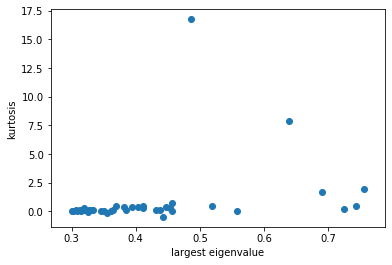

In [11]:
plt.scatter(results["largest_eig_values"], results["kurtosis"])
plt.xlabel("largest eigenvalue")
plt.ylabel("kurtosis")

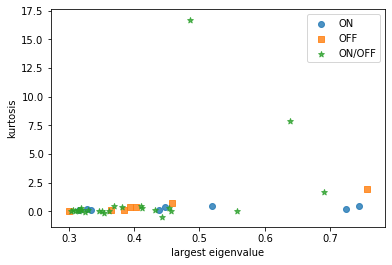

In [12]:
# plot for each cell type
results_on = results.loc[results["cell_type"]=="ON"]
results_off = results.loc[results["cell_type"]=="OFF"]
results_on_off = results.loc[results["cell_type"]=="ON/OFF"]

# plt.figure(figsize=(12,3))
# plt.subplot(131)
ax=plt.scatter(results_on["largest_eig_values"], results_on["kurtosis"], marker="o", alpha=0.8)
plt.xlabel("largest eigenvalue")
plt.ylabel("kurtosis")

# plt.subplot(132)
plt.scatter(results_off["largest_eig_values"], results_off["kurtosis"], marker="s", alpha=0.8)
plt.xlabel("largest eigenvalue")
plt.ylabel("kurtosis")

# plt.subplot(133)
plt.scatter(results_on_off["largest_eig_values"], results_on_off["kurtosis"], marker="*", alpha=0.8)
plt.xlabel("largest eigenvalue")
plt.ylabel("kurtosis")

plt.legend(["ON", "OFF", "ON/OFF"])

Text(0, 0.5, 'kurtosis')

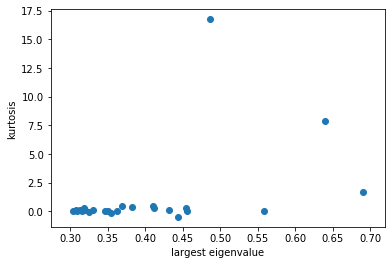

In [13]:
plt.scatter(results_on_off["largest_eig_values"], results_on_off["kurtosis"], marker="o")# , alpha=0.8)
plt.xlabel("largest eigenvalue")
plt.ylabel("kurtosis")

# plt.legend(["ON", "OFF", "ON/OFF"])

In [14]:
results_on_off

,channel_name,cell_type,largest_eig_values,kurtosis
0,12a,ON/OFF,0.455981,0.047361
1,13c,ON/OFF,0.381917,0.351167
2,16a,ON/OFF,0.315114,-0.001641
3,21b,ON/OFF,0.318001,0.133269
4,22b,ON/OFF,0.313448,0.105355
5,22d,ON/OFF,0.361678,-0.022156
6,23a,ON/OFF,0.307121,0.122073
8,23d,ON/OFF,0.638946,7.884196
9,25a,ON/OFF,0.302862,0.006930
11,26b,ON/OFF,0.314308,0.072191


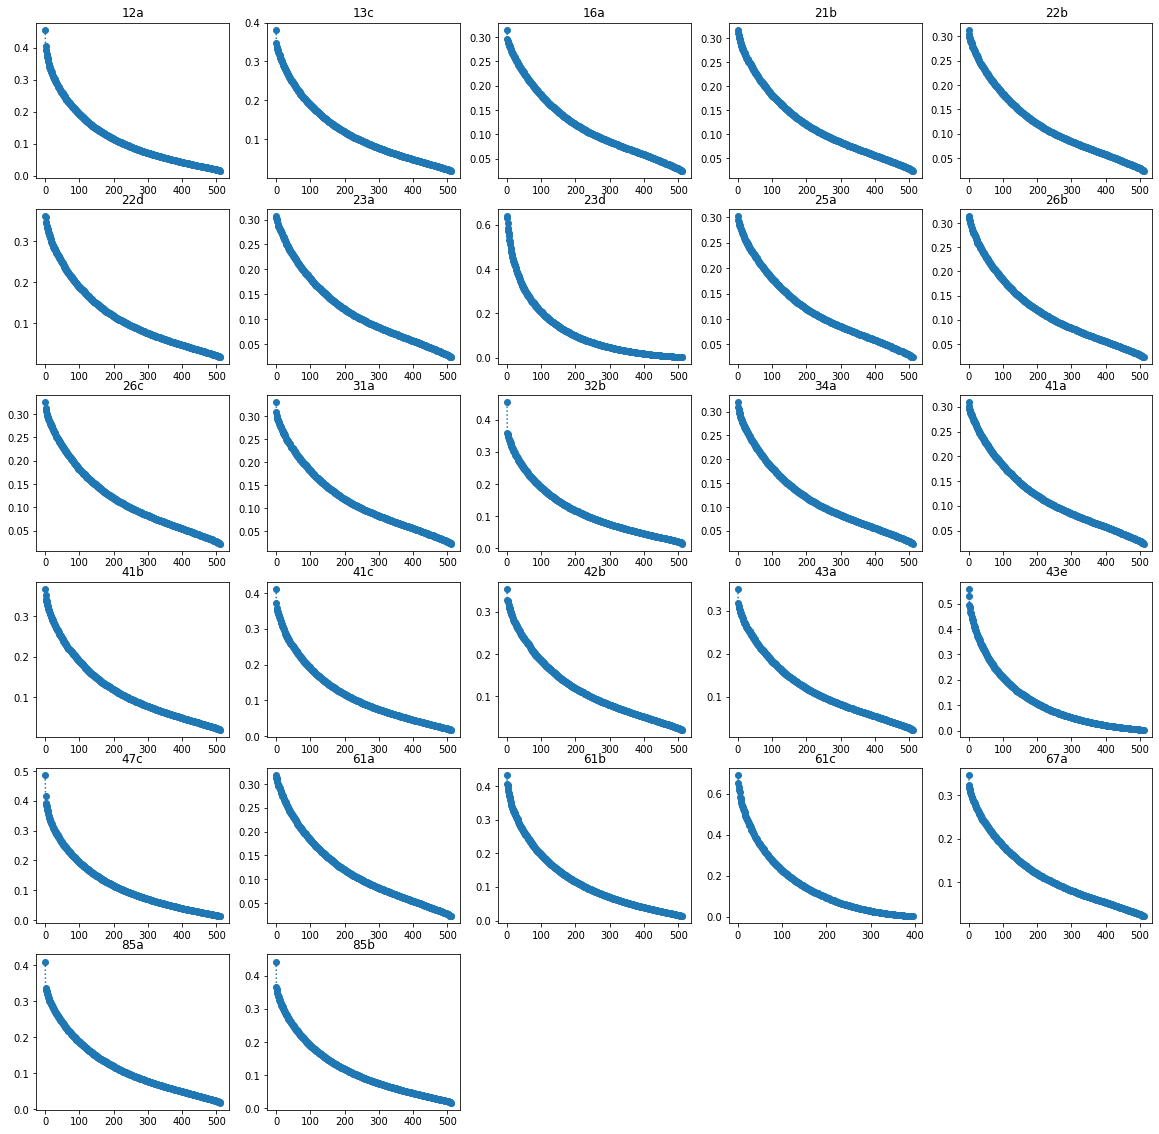

In [15]:
# plot eigenvalues for ON/OFF cells

def plot_eigenvalues(all_eigen_values, channel_names):
    
    num_subplots=len(channel_names)
    num_row = int(np.ceil(np.sqrt(num_subplots)))
    num_col = int(np.ceil(num_subplots / num_row))

    plt.figure(figsize=(20,20))
    for i, channel_name in enumerate(channel_names):
        plt.subplot(num_row, num_col,i+1)
        plt.plot(all_eig_values[channel_name],"o:")
        plt.title(channel_name)

plot_eigenvalues(all_eig_values, results_on_off["channel_name"])
plt.savefig("{}/eigenvalues_on_off.png".format(folder_name))

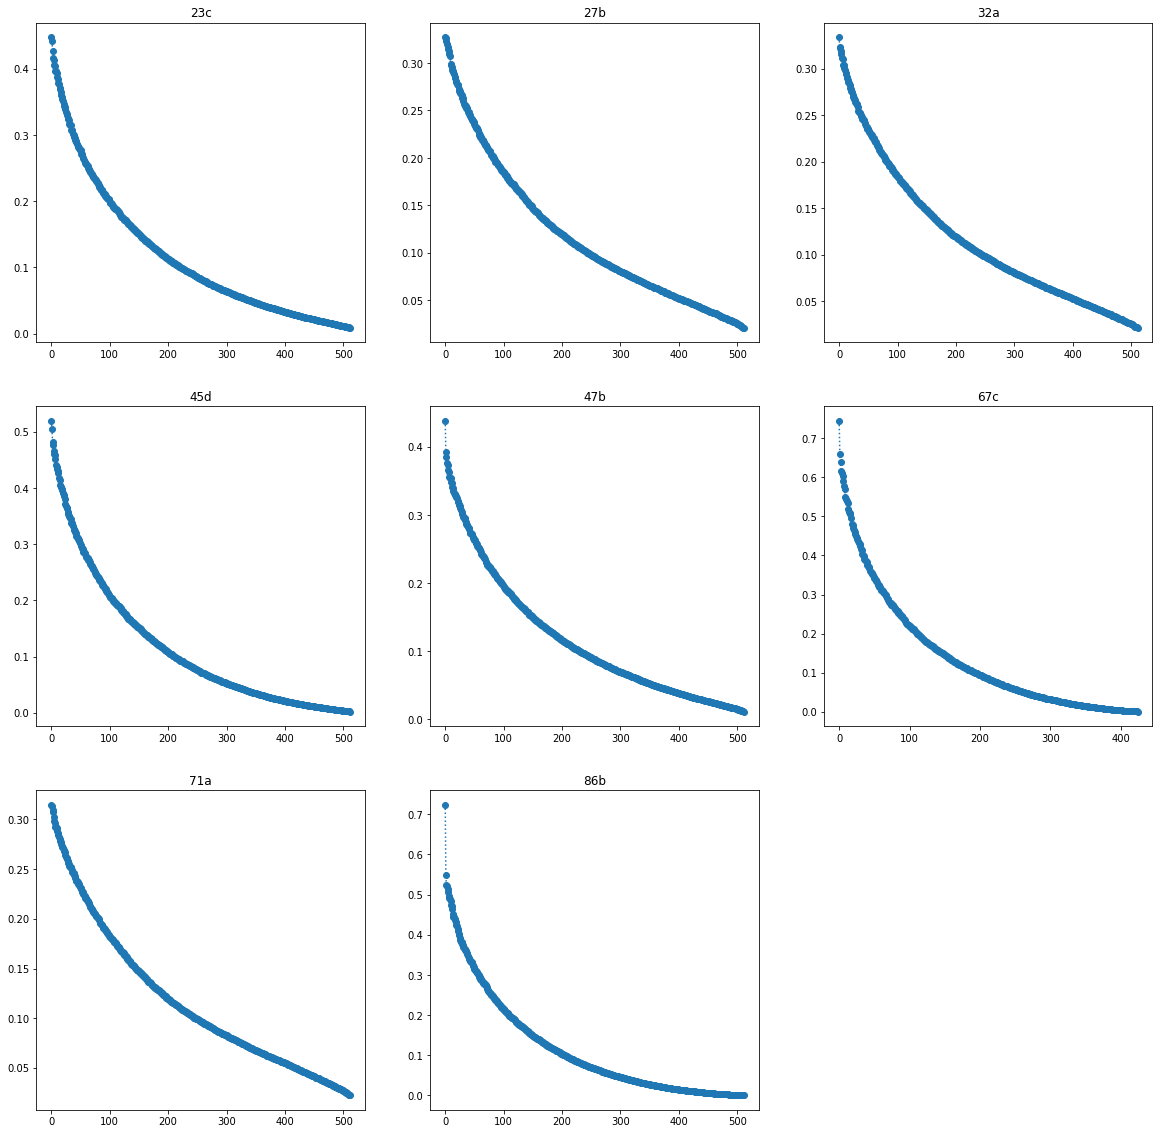

In [16]:
plot_eigenvalues(all_eig_values, results_on["channel_name"])
plt.savefig("{}/eigenvalues_on.png".format(folder_name))

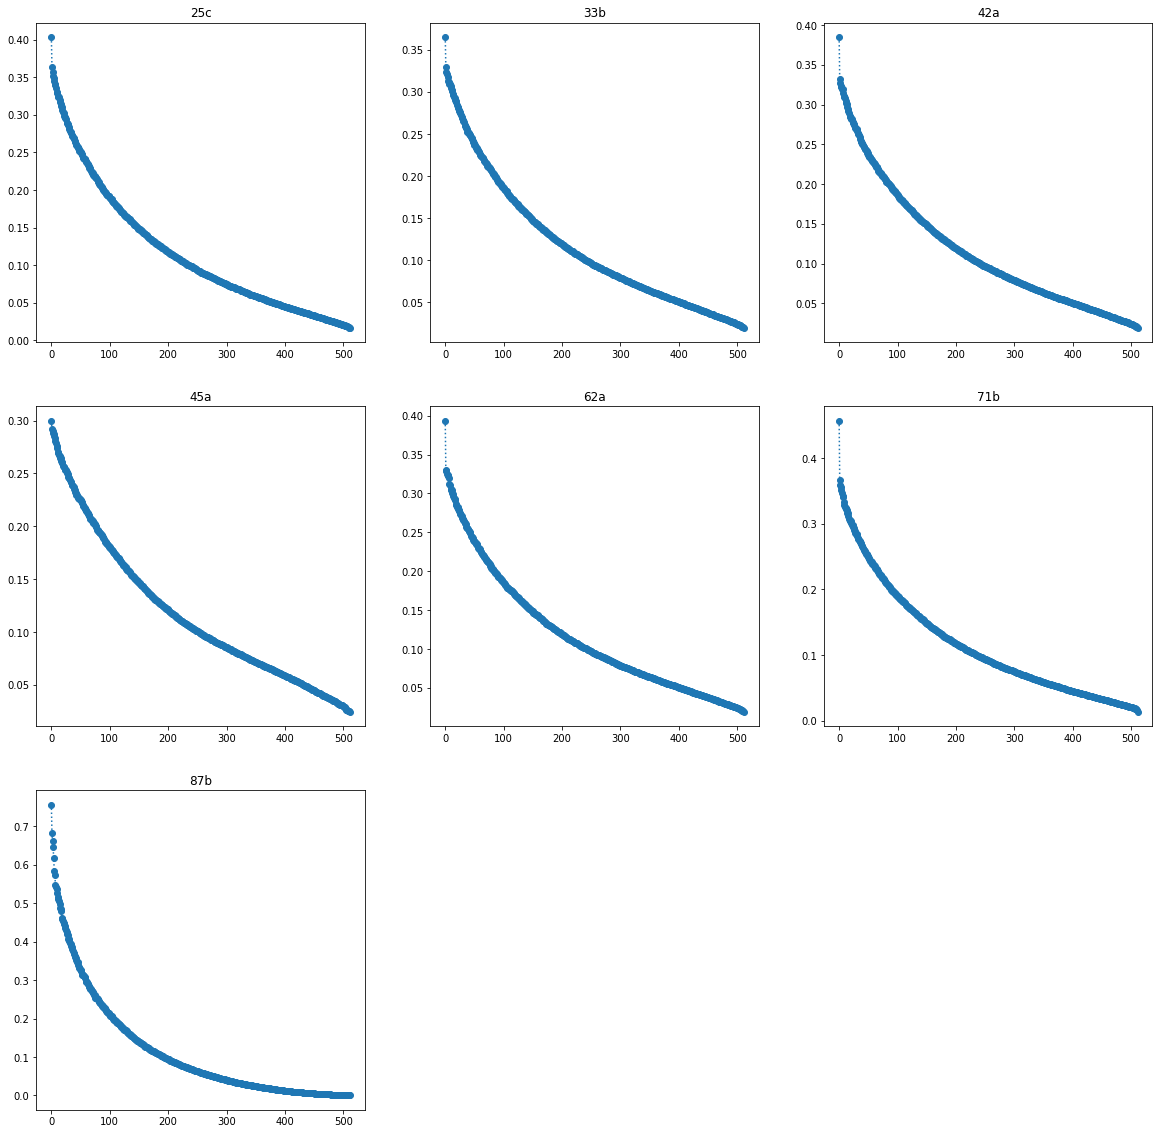

In [17]:
plot_eigenvalues(all_eig_values, results_off["channel_name"])
plt.savefig("{}/eigenvalues_off.png".format(folder_name))